# Convolution on Images

This notebook is about learning to apply convolutions on an image using Tensorflow. Idea is to create a weight matrix and apply the function conv2d with 'same' and 'valid' padding to check the effects on output image. 

To give an overview of how the output changes based on convolution parameters, this notebook is designed to build Layer one of Convolution Neural Network (CNN) along with maxpooling and relu functions and visualize the outputs given an input image. 

### First, let's import the TensorFlow library and Python dependencies

In [1]:
# Importing
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import tensorflow as tf

### Read and display image by coverting it to a gray scale.   

Read the input image as float data type as Tensorflow accepts images in float format. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,0,' Gray Scale Image ')

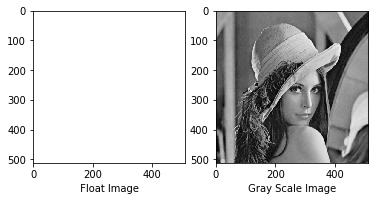

In [2]:
# Read the image as Float data type
im = imageio.imread("img/lena.png").astype(np.float)

# Convert image to gray scale
grayim = np.dot(im[...,:3], [0.299, 0.587, 0.114])


# Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")

plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")


The shape of Gray Scale Image

In [3]:
print(grayim.shape)

(512, 512)


### Extend the Dimensions of the Gray Scale Image

For convolution, TensorFlow accepts images of dimensions:

[num of images, width, height, channels].

In this case we are looking for dimensions of [1, 512, 512, 1] from (512, 512).

In [4]:
image = np.expand_dims(np.expand_dims(grayim, 0), -1)

print(image.shape)

(1, 512, 512, 1)


### Create placeholder for an input image and print the shape

The placeholder takes input in float format and same size of input image

In [5]:
img_ph = tf.placeholder(tf.float32, shape=[None, 512, 512, 1])
print(img_ph.get_shape().as_list())

[None, 512, 512, 1]


### Create a Variable for Weight Matrix and Print the Shape

The shape of weight matrix is of the form:
[ Height, widht, Input, Output]. 

In this case lets create weight matrix of size 5 X 5 and keep the number of inputs and output to just 1. So, the shape is of a form: [5, 5, 1, 1].

In [6]:
shape = [5, 5, 1, 1]
weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))
print(weights.get_shape().as_list())

[5, 5, 1, 1]


###  Create Two Convolution Graphs in Tensorflow

lets use the functon tf.nn.conv2d to create a graph for convolution operation with padding 'SAME' and padding 'VALID'.

In [7]:
# Convolution output 1
convolution1 = tf.nn.conv2d(input=img_ph, filter=weights, strides=[1, 1, 1, 1], padding="SAME")

# Convolution output 2
convolution2 = tf.nn.conv2d(input=img_ph, filter=weights, strides=[1, 1, 1, 1], padding="VALID")

### Initialize all variables and Run the Sessions

In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Run the sessions to get the results for the two convolution operations 

In [9]:
# Session for Result 1
result1 = sess.run(convolution1, feed_dict={img_ph: image})


# Session for Result 2
result2 = sess.run(convolution2, feed_dict={img_ph: image})

###  Display the output images 

The result of convolution with 'same' padding is of the form [1, 512, 512, 1] and for 'valid' padding image is of the shape [1, 508, 508, 1]. To display the images, our job is to reshape the dimensions in the form (512, 512) and (508, 508) respectively.

In [10]:
# For the result with 'SAME' padding
# Reduce the dimensions
vec1 = np.reshape(result1, (1, -1))
# Reshape the image
image1 = np.reshape(vec1, (512, 512))

print(image1.shape)


# For the result with 'VALID' padding
# Reduce the dimensions
vec2 = np.reshape(result2, (1, -1))
# Reshape the image
image2 = np.reshape(vec2, (508, 508))

print(image2.shape)

(512, 512)
(508, 508)


Display the images.

Text(0.5,0,' VALID Padding ')

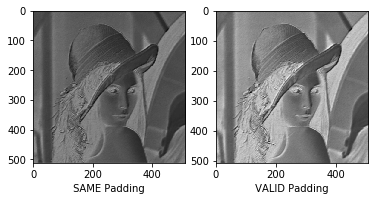

In [11]:
# Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap=plt.get_cmap("gray"))
plt.xlabel(" SAME Padding ")

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap=plt.get_cmap("gray"))
plt.xlabel(" VALID Padding ")

## Create First Convolution Neural Network Layer


Using above conv2d function lets build a conv layer. Usually most general CNN architecture - Layer 1 comprises of Convolution, Relu and MaxPooling. Lets create these functions to check the effects on "Lena" image. Depending on the architecture these functions may change. Lets assume our Layer 1 has just three functions: Convolution, Relu and Maxpooling.

It is most often repetation of these layers stacked on top of each other to create Deep CNN.

In [12]:
# Functions for convolution and maxpooling

def conv2d(X, W):
    return tf.nn.conv2d(input=X, filter=W, strides=[1, 1, 1, 1], padding="SAME")

def max_pool(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

### Create Weights and Biases for Convolution

The weights are of the shape [Height, Width , Input , Output]. Here lets create the weights of size 5X5 which has 1 input and 32 Outputs. 

In [13]:
weights = {
        # 5 x 5 convolution, 1 input image, 32 outputs
        "W_conv1": tf.Variable(tf.random_normal([5, 5, 1, 32]))
    }

biases = {
        # Bias should be of the size of number of Outputs
       "b_conv1": tf.Variable(tf.random_normal([32]))        
    }

### Define a TensorFlow Graph for Relu, Convolution and Maxpooling

The output of conv2d is passed through Relu Layer and finally, the output of Relu is given as input for Maxpooling layer. Let's define the graph and print the shapes. The size of image is reduced after passing through Maxpool Layer. You can change the size and strides in Maxpool layer to check how the image size varies.

In [14]:
conv1 = tf.nn.relu(conv2d(img_ph, weights["W_conv1"]) + biases["b_conv1"])
mxpool = max_pool(conv1)
    
print(conv1.get_shape().as_list())
print(mxpool.get_shape().as_list())

[None, 512, 512, 32]
[None, 256, 256, 32]


### Initialize all TensorFlow Variables and Run the Session

In [15]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### Run session to get the output of Layer 1 

The session is run on mxpool which will be the final output.

In [16]:
layer1 = sess.run(mxpool, feed_dict={img_ph: image})

### Visualize the Output of Convolution Layer 1 

(1, 256, 256, 32)
(256, 256, 32)


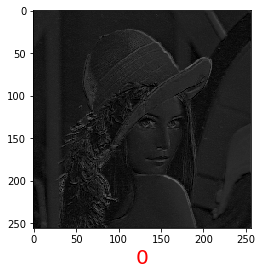

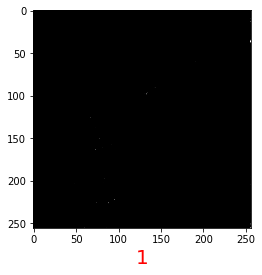

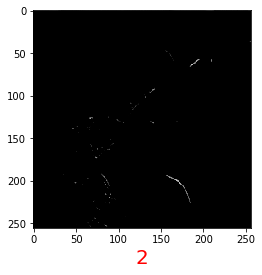

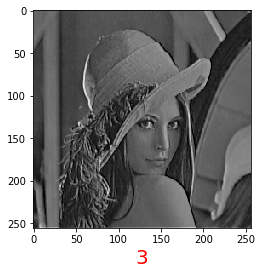

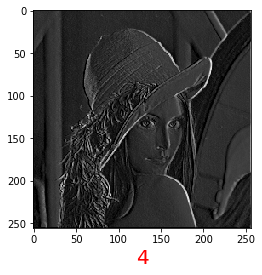

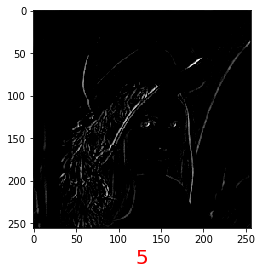

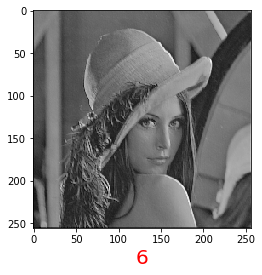

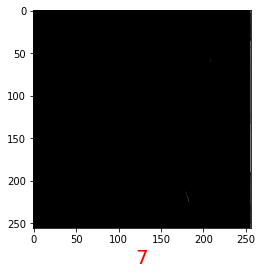

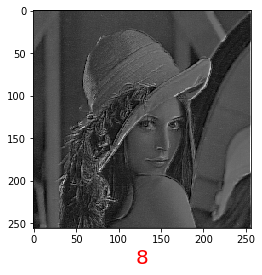

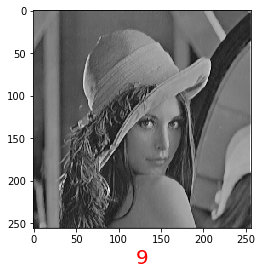

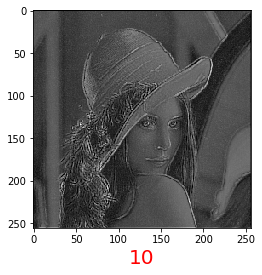

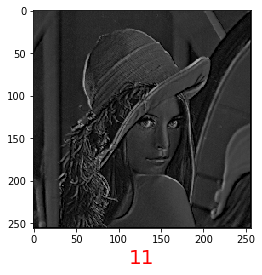

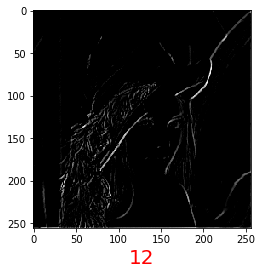

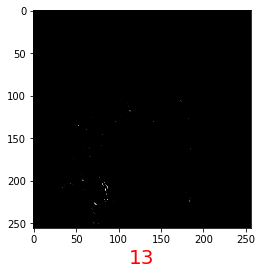

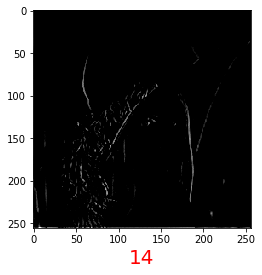

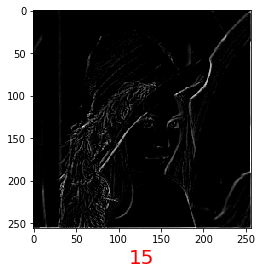

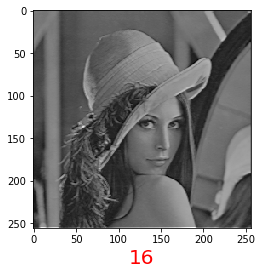

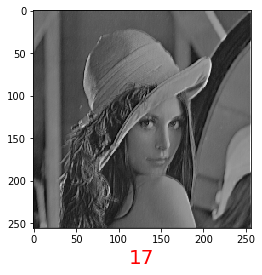

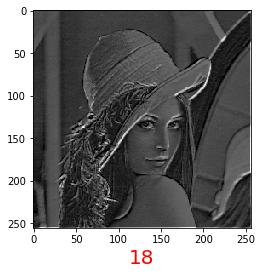

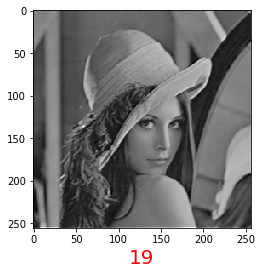

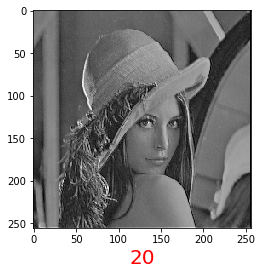

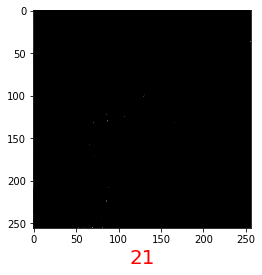

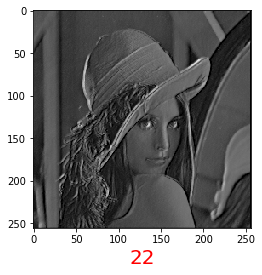

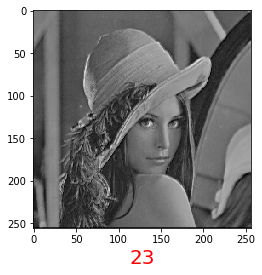

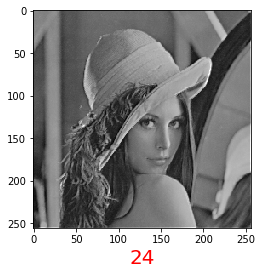

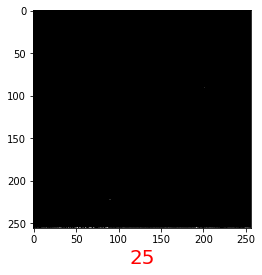

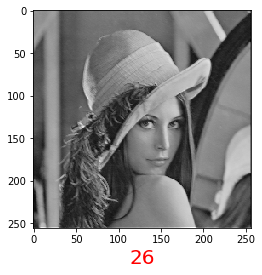

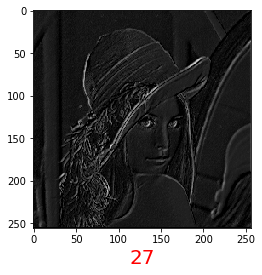

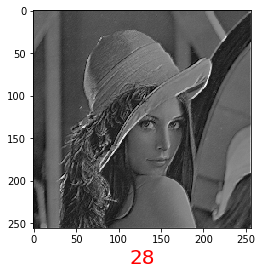

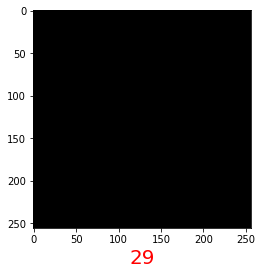

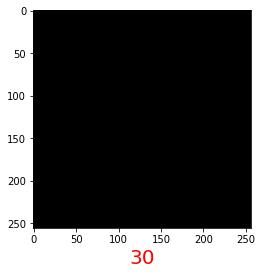

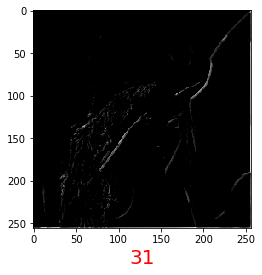

In [17]:
print(layer1.shape)

vec = np.reshape(layer1, (256, 256, 32));
print(vec.shape)

for i in range (32):
    image = vec[:,:,i]
    plt.imshow(image, cmap=plt.get_cmap("gray"))
    plt.xlabel(i, fontsize=20, color='red')
    plt.show()
    plt.close()